In [47]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
#assumes no surcharge already, i.e. either 
#1. <31 yo
#2. had adequate cover till now
def get_cost(current_age, age_start_getting_health_insurance):
    if age_start_getting_health_insurance <= current_age:
        return 1000
    years_of_surcharge = max(0, age_start_getting_health_insurance-max(31, current_age))
    additional_cost_from_surcharge = 10 * years_of_surcharge * 0.02 #2% per year, for 10 years
    if years_of_surcharge==0:
        return 1000
    else:
        return 1000*(1-additional_cost_from_surcharge/years_of_surcharge)

In [80]:
current_ages = np.arange(29,65)
age_start_getting_insurance = np.arange(29,65)


In [81]:
results = []
for age in current_ages:
    for age_get_insurance in age_start_getting_insurance:
        results.append({
            'age': age,
            'age_get_insurance': age_get_insurance,
            'cost': get_cost(age, age_get_insurance)
        })

In [82]:
df = pd.DataFrame(results)

In [83]:
cost_df = df.pivot_table(index='age',columns='age_get_insurance', values='cost')

In [84]:
cost_df = cost_df[cost_df.columns[::-1]]

Text(0.5, 51.0, 'Current Age')

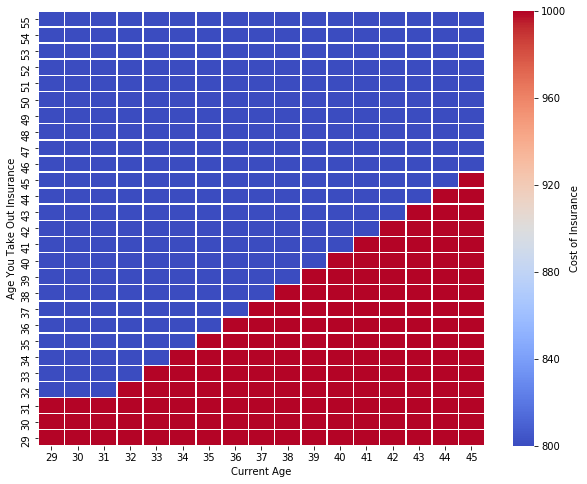

In [86]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(cost_df.loc[25:45,55:29].T,ax=ax, linewidths=.5,
            cbar_kws={'label': 'Cost of Insurance'}, vmax=1000, cmap='coolwarm');
ax.set_ylabel("Age You Take Out Insurance")
ax.set_xlabel("Current Age")
